In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


C:\Users\Owner\Anaconda3\envs\vc\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Owner\Anaconda3\envs\vc\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Owner\Anaconda3\envs\vc\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Owner\Anaconda3\envs\vc\lib\site-packages\tensorflow\python\framework\dty

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

Epoch: 0001 Avg. cost = 0.1975
Epoch: 0002 Avg. cost = 0.0627
Epoch: 0003 Avg. cost = 0.0517
Epoch: 0004 Avg. cost = 0.0471
Epoch: 0005 Avg. cost = 0.0437
Epoch: 0006 Avg. cost = 0.0416
Epoch: 0007 Avg. cost = 0.0399
Epoch: 0008 Avg. cost = 0.0378
Epoch: 0009 Avg. cost = 0.0367
Epoch: 0010 Avg. cost = 0.0361
Epoch: 0011 Avg. cost = 0.0358
Epoch: 0012 Avg. cost = 0.0353
Epoch: 0013 Avg. cost = 0.0349
Epoch: 0014 Avg. cost = 0.0345
Epoch: 0015 Avg. cost = 0.0343
Epoch: 0016 Avg. cost = 0.0340
Epoch: 0017 Avg. cost = 0.0335
Epoch: 0018 Avg. cost = 0.0333
Epoch: 0019 Avg. cost = 0.0328
Epoch: 0020 Avg. cost = 0.0318
최적화 완료 ! 


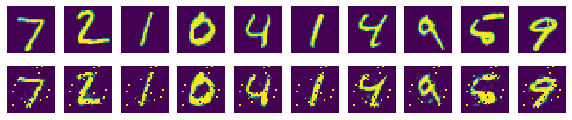

In [3]:

learning_rate = 0.01
training_epoch = 20
batch_size = 100
# 신경망 레이어 구성 옵션
n_hidden = 256  # 히든 레이어의 뉴런 갯수
n_input = 28*28 

# 모델 구성
X=tf.placeholder(tf.float32,[None,n_input])

# input->encode->decode->output
W_encode=tf.Variable(tf.random_normal([n_input,n_hidden]))
b_encode=tf.Variable(tf.random_normal([n_hidden]))

# sigmoid(X*W+b)
encoder=tf.nn.sigmoid(tf.add(tf.matmul(X,W_encode),b_encode))

# encode의 아웃풋 크기를  28*28=784 -> 64로 줄여 압축하여 특성을 뽐아냄
# decode의 출력을 입력값과 동일한 크기를 갖도록 하여 같은 아웃풋을 만들어냄 // autoencoder

W_decode=tf.Variable(tf.random_normal([n_hidden,n_input]))
b_decode=tf.Variable(tf.random_normal([n_input]))
decoder=tf.nn.sigmoid(tf.add(tf.matmul(encoder,W_decode),b_decode))

# mean((x-decoder)^2)
cost=tf.reduce_mean(tf.pow(X-decoder,2))
optimizer=tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)

# train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    total_batch=int(mnist.train.num_examples/batch_size)
    
    for epoch in range(training_epoch):
        total_cost=0
        for i in range(total_batch):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            _,cost_val=sess.run([optimizer,cost],feed_dict={X:batch_xs})
            total_cost+=cost_val
            
        print('Epoch:','%04d'%(epoch+1),'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))
    print('최적화 완료 ! ')

    
    
    # 결과 확인
    sample_size = 10
    
    # 제일 마지막 단 decoder 계산 / test dataset으로
    samples = sess.run(decoder,
                       feed_dict={X: mnist.test.images[:sample_size]})

    fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

    for i in range(sample_size):
        ax[0][i].set_axis_off()
        ax[1][i].set_axis_off()
        # 정답
        ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        # decoder 값
        ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

    plt.show()